In [1]:
import numpy as np
import cv2
from mss import mss
from PIL import Image
import time
import matplotlib.pyplot as plt
#import pyautogui
import pydirectinput
import keyboard

In [2]:
sct = mss()

In [3]:
#bounding_box = {"top":325, "left":300, "width":370, "height":385} #tetr.io (field, hold, and next)
#bounding_box = {"top":325, "left":396, "width":168, "height":378} #tetr.io (field)
#bounding_box = {"top":325, "left":300, "width":370, "height":385} #tetr.io (hold)
#bounding_box = {"top":385, "left":580, "width":80, "height":242} #tetr.io (next)
bounding_box = {"top":325, "left":396, "width":270, "height":378} #tetr.io (field and next)

In [27]:
while True:
    screenshot = sct.grab(bounding_box)
    cv2.imshow("screen", np.array(screenshot))
    if (cv2.waitKey(1) & 0xFF) == ord('q'):
        cv2.destroyAllWindows()
        break

In [7]:
#lower_red = [48, 46, 145]
lower_red = np.array([359, 68, 56], np.uint8)
#upper_red = [112, 108, 219]
upper_red = np.array([358, 51, 86], np.uint8)
with mss() as sct:
    #time.sleep(3)
    allContours = []
    while True:
        screenShot = sct.grab(bounding_box)

        img = Image.frombytes(
            'RGB', 
            (screenShot.width, screenShot.height), 
            screenShot.rgb, 
        )

        img = np.array(img)[:, :, ::-1].copy()
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        #blur = cv2.GaussianBlur(img, (5, 5), 0)
        blur = cv2.bilateralFilter(img,9,75,75)

        # grayscale
        gray = cv2.cvtColor(np.array(blur), cv2.COLOR_BGR2GRAY)

        #threshold
        thresh = cv2.threshold(gray, 64, 255, cv2.THRESH_BINARY)[1]

        # get contour bounding boxes and draw on copy of input
        contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        contours = contours[0] if len(contours) == 2 else contours[1]

        minoContours = []
        for contour in contours:
            if cv2.contourArea(contour) <= 1300 and  cv2.contourArea(contour) >= 800:
                minoContours.append(contour)
        minoContours = tuple(minoContours)

        mask = np.zeros(img.shape, np.uint8)
        if len(minoContours) >= 1:
            cv2.drawContours(mask, minoContours[len(minoContours)-1], -1, 255, -1)
        
        #mean = cv2.mean(img, mask)

        #result = img.copy()
        #for c in contours:
        #    x,y,w,h = cv2.boundingRect(c)
        #    cv2.rectangle(result, (x, y), (x+w-1, y+h-1), (0, 0, 255), 2)
        cv2.drawContours(img, contours, -1, (128,0,255), 2)
        # view result
        cv2.imshow('screen', np.array(img))

        if (cv2.waitKey(1) & 0xFF) == ord('q'):
            cv2.destroyAllWindows()
            break
        
        allContours.append(contours)
        #print(allContours)

C:\Users\sanja\AppData\Local\Temp\ipykernel_19436\2237156584.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 359 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  lower_red = np.array([359, 68, 56], np.uint8)
C:\Users\sanja\AppData\Local\Temp\ipykernel_19436\2237156584.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 358 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  upper_red = np.array([358, 51, 86], np.uint8)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\sanja\AppData\Local\Temp\ipykernel_20112\1132627604.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 359 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  lower_red = np.array([359, 68, 56], np.uint8)
C:\Users\sanja\AppData\Local\Temp\ipykernel_20112\1132627604.py:2: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 358 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  upper_red = np.array([358, 51, 86], np.uint8)
C:\Users\sanja\AppData\Local\Temp\ipykernel_20112\1132627604.py:3: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 359 to uint8 wi

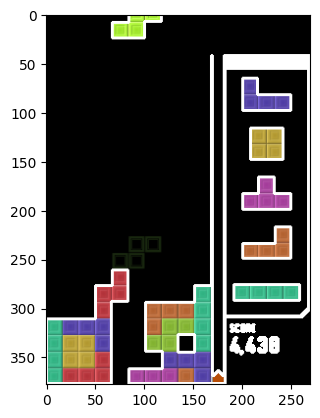

In [16]:
lower_red = np.array([359, 68, 56], np.uint8)
upper_red = np.array([358, 51, 86], np.uint8)
lower_red = np.array([359, 70, 90], np.uint8)
upper_red = np.array([358, 50, 50], np.uint8)

with mss() as sct:
    #time.sleep(3)
    allContours = []
    screenShot = sct.grab(bounding_box)

    img = Image.frombytes(
        'RGB', 
        (screenShot.width, screenShot.height), 
        screenShot.rgb, 
    )

    img = np.array(img)[:, :, ::-1].copy()
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    #blur = cv2.GaussianBlur(img, (5, 5), 0)
    blur = cv2.bilateralFilter(img,9,75,75)

    # grayscale
    gray = cv2.cvtColor(np.array(blur), cv2.COLOR_BGR2GRAY)

    #threshold
    thresh = cv2.threshold(gray, 64, 255, cv2.THRESH_BINARY)[1]

    # get contour bounding boxes and draw on copy of input
    contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    minoContours = []
    for contour in contours:
        if cv2.contourArea(contour) <= 1300 and  cv2.contourArea(contour) >= 800:
            minoContours.append(contour)
    minoContours = tuple(minoContours)

    mask = np.zeros(img.shape, np.uint8)
    if len(minoContours) >= 1:
        cv2.drawContours(mask, minoContours[len(minoContours)-1], -1, 255, -1)
    
    #mean = cv2.mean(img, mask)

    #result = img.copy()
    #for c in contours:
    #    x,y,w,h = cv2.boundingRect(c)
    #    cv2.rectangle(result, (x, y), (x+w-1, y+h-1), (0, 0, 255), 2)
    cv2.drawContours(img, contours, -1, (255,255,255), 2)
    # view result
    frame_threshed = cv2.inRange(hsv_img, lower_red, upper_red)
    print(frame_threshed)
    plt.imshow(np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
    allContours.append(contours)
    #print(allContours)

In [4]:
O_CONTOURS = (np.array([[[23,  8]],

       [[23, 41]],

       [[56, 41]],

       [[56,  8]]], dtype="int32"),)
J_CONTOURS = (np.array([[[15,  8]],

       [[15, 41]],

       [[64, 41]],

       [[64, 25]],

       [[31, 25]],

       [[30, 24]],

       [[30,  8]]], dtype="int32"),)
S_CONTOURS = (np.array([[[31,  8]],

       [[31, 24]],

       [[30, 25]],

       [[15, 25]],

       [[15, 41]],

       [[47, 41]],

       [[47, 25]],

       [[48, 24]],

       [[64, 24]],

       [[64,  8]]], dtype="int32"),)
Z_CONTOURS = (np.array([[[15,  8]],

       [[15, 24]],

       [[30, 24]],

       [[31, 25]],

       [[31, 41]],

       [[64, 41]],

       [[64, 25]],

       [[48, 25]],

       [[47, 24]],

       [[47,  8]]], dtype="int32"),)
L_CONTOURS = (np.array([[[48,  8]],

       [[48, 24]],

       [[47, 25]],

       [[15, 25]],

       [[15, 41]],

       [[64, 41]],

       [[64,  8]]], dtype="int32"),)
T_CONTOURS = (np.array([[[31,  8]],

       [[31, 24]],

       [[30, 25]],

       [[15, 25]],

       [[15, 41]],

       [[64, 41]],

       [[64, 25]],

       [[48, 25]],

       [[47, 24]],

       [[47,  8]]], dtype="int32"),)
I_CONTOURS = (np.array([[[ 6, 17]],

       [[ 6, 32]],

       [[73, 32]],

       [[73, 17]]], dtype="int32"),)

In [5]:
def contourToMino(contour):
    if np.array_equal(contour, S_CONTOURS):
        return "S"
    elif np.array_equal(contour, Z_CONTOURS):
        return "Z"
    elif np.array_equal(contour, J_CONTOURS):
        return "J"
    elif np.array_equal(contour, L_CONTOURS):
        return "L"
    elif np.array_equal(contour, T_CONTOURS):
        return "T"
    elif np.array_equal(contour, O_CONTOURS):
        return "O"
    elif np.array_equal(contour, I_CONTOURS):
        return "I"
    else:
        return "None"

In [6]:
pydirectinput.PAUSE = 0.001

contours = np.array([0, 0], dtype="int32")
firstTime = True
wasteT = True

time.sleep(1)
pydirectinput.click(x=540, y=540)
pydirectinput.keyDown("2")
time.sleep(0.3)
pydirectinput.keyUp("2")
time.sleep(1)
with mss() as sct:
    while True:

        screenShot = sct.grab(bounding_box)

        img = Image.frombytes(
            'RGB', 
            (screenShot.width, screenShot.height), 
            screenShot.rgb, 
        )

        img = np.array(img)[:, :, ::-1].copy()
        
        img = cv2.putText(img, contourToMino(contours), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        if not firstTime:
            if contourToMino(contours) == "T":
                if wasteT:
                    pydirectinput.press("shiftleft")
                    pydirectinput.press("left", presses=3)
                    pydirectinput.press("s")
                    wasteT = False
                else:
                    pydirectinput.press("d")
                    pydirectinput.press("left", presses=1)
                    pydirectinput.press('w')
                    pydirectinput.press("d")
                    pydirectinput.press("s")
            elif contourToMino(contours) == "J":
                pydirectinput.press("d")
                pydirectinput.press("left", presses=4)
                pydirectinput.press("s")
            elif contourToMino(contours) == "L":
                pydirectinput.press("a")
                pydirectinput.press("right", presses=4)
                pydirectinput.press("s")
            elif contourToMino(contours) == "S":
                pydirectinput.press("right", presses=1)
                pydirectinput.press("s")
            elif contourToMino(contours) == "O":
                pydirectinput.press("right", presses=1)
                pydirectinput.press('w')
                pydirectinput.press("right", presses=1)
                pydirectinput.press("s")
            elif contourToMino(contours) == "Z":
                pydirectinput.press("d")
                pydirectinput.press("left", presses=2)
                pydirectinput.press('w')
                pydirectinput.press("left", presses=1)
                pydirectinput.press("s")
            elif contourToMino(contours) == "I":
                pydirectinput.press("d")
                pydirectinput.press("right", presses=4)
                pydirectinput.press("s")
            #time.sleep(2)

        crop = img[57:115,185:265]

        #blur = cv2.GaussianBlur(img, (5, 5), 0)
        blur = cv2.bilateralFilter(crop,9,75,75)

        # grayscale
        gray = cv2.cvtColor(np.array(blur), cv2.COLOR_BGR2GRAY)

        #threshold
        thresh = cv2.threshold(gray, 64, 255, cv2.THRESH_BINARY)[1]

        # get contour bounding boxes and draw on copy of input
        contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        
        cv2.drawContours(crop, contours, -1, (255,255,255), 2)
        # view result
        img[57:115,185:265] = crop
        cv2.imshow('screen', np.array(img))

        if firstTime:
            firstTime = False
            pydirectinput.click()
            time.sleep(3)
            # cv2.destroyAllWindows()
            # plt.imshow(cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))
            # break

        if (cv2.waitKey(1) & 0xFF) == ord('q'):
        #if keyboard.is_pressed("q"):
            cv2.destroyAllWindows()
            #plt.imshow(cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB))
            break

In [13]:
#(715, 504) again button

(378, 270, 3)